# Problemas Elı́pticos

Hasta aqui, hemos aprendido a resolver problemas dominados por **conveccion** --donde la solucion posee un sesgo direccional y puede formar choques-- en el [modulo 3](../modulo3/).
Por otra parte, hemos explorado problemas dominados por **difusion** --donde la solucion se propaga en todas direcciones-- en el [modulo 4](../modulo4/). Pero que hay acerca de aquellas situaciones donde la solucion es **estacionaria**?

Muchos problemas fisicos **no** tienen dependencia temporal: el campo gravitacional producido por un objeto masivo, el potencial electrostatico de una distribucion de carga, el flujo estacionario de un fluido a traves de un medio poroso ... todos estos pueden modelarse por medio de la **ecuacion de Poisson**:

$$
\begin{equation}
\nabla^2 u = f
\end{equation}
$$

donde la incognita $u$ y el dato $f$ son funciones del espacio, en un dominio $\Omega$. A fin de encontrar la solucion, requerimos condiciones frontera! Estas pueden ser condiciones de borde tipo Dirichlet, para lo cual especificamos el valor de la solucion en la frontera,

$$
\begin{equation}
u = b_1 \text{ en } \partial\Omega,
\end{equation}
$$

o condiciones de borde tipo Neumann, para lo cual especificamos la derivada normal de la solucion en la frontera,

$$
\begin{equation}
\frac{\partial u}{\partial n} = b_2 \text{ en } \partial\Omega.
\end{equation}
$$

Un problema de valor de contorno (*boundary-value problem*) consiste en determinar $u$, dada la informacion anterior. Numericamente, podemos hacer esto empleando **metodos de relajacion** los cuales parten de una estimacion inicial para $u$ y luego iteran hacia la solucion.

## Ecuacion de Laplace

El caso particular de $f=0$ (caso homogeneo) resulta en la ecuacion de Laplace:

$$
\begin{equation}
\nabla^2 u = 0
\end{equation}
$$

Por ejemplo, la ecuacion para conduccion de calor estacionaria bi-dimensional es:

$$
\begin{equation}
\frac{\partial ^2 T}{\partial x^2} + \frac{\partial ^2 T}{\partial y^2} = 0
\end{equation}
$$

Esta es similar a la correspondiente al modelo considerado en el [cuaderno 3 del modulo 4](../modulo4/04_03_EcuacionCalor_2D_Explicita.ipynb), pero sin la derivada temporal: esto es, para una temperatura $T$ que ha alcanzado el estado estacionario. La ecuacion de Laplace modela el estado de equilibrio de un sistema sujeto a determinadas condiciones de borde.

De ahora en adelante usaremos $p$ para representar nuestra variable dependiente generica, y escribamos la ecuacion de Laplace 2D nuevamente:

$$
\begin{equation}
\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = 0
\end{equation}
$$

De forma analoga a lo efectuado para la ecuacion de difusion en el modulo anterior, discretizamos las derivadas de segundo orden empleando *diferencias centradas*. En una grilla Cartesiana 2D, resulta:

$$
\begin{equation}
\frac{p_{i+1, j}  - 2p_{i,j}  + p_{i-1,j} }{\Delta x^2} + \frac{p_{i,j+1}  - 2p_{i,j}  + p_{i, j-1} }{\Delta y^2} = 0
\end{equation}
$$

Cuando $\Delta x = \Delta y$, tendremos la ecuacion siguiente:

$$
\begin{equation}
p_{i+1, j}   + p_{i-1,j} + p_{i,j+1}  + p_{i, j-1}- 4 p_{i,j} = 0
\end{equation}
$$

Esta nos dice que el operador diferencial Laplaciano en el punto $(i,j)$ puede evaluarse en forma discreta empleando el valor de $p$ en aquel punto (con un factor $-4$) y los cuatro puntos vecinos situados a la izquierda, derecha, arriba y abajo del punto de grilla $(i,j)$.

La siguiente figura ilustra el *stencil* del operador discreto Laplaciano.

<img src="./figuras/laplace.svg">

#### Stencil de 5 puntos de Laplace.

La ecuacion discreta anterior es valida para todo punto interior del dominio. Si escribimos las ecuaciones para todos los puntos interiores, tendremos un sistema lineal de ecuaciones algebraicas. Podriamos resolver tal sistema lineal en forma *directa* (por ejemplo, a traves de eliminacion de Gauss), pero consideremos una forma mas elegante!

Notamos que la matriz de coeficientes de tal sistema lineal tiene ceros en su mayor parte. Para una grilla espacial uniforme, la matriz es *diagonal en bloques*: presenta bloques tridiagonales con $-4$ en la diagonal principal y $1$ en ambas diagonales fuera del centro, y 2 diagonales con $1$. Los **metodos iterativos** se adaptan particularmente para un sistema con esta estructura, y nos evitan el almacenamiento de todos estos ceros. 

Comenzaremos con una estimacion inicial de la solucion, $p_{i,j}^{0}$, y usaremos el operador discreto Laplaciano para obtener una actualizacion, $p_{i,j}^{1}$, y luego calcular $p_{i,j}^{k}$. Notemos aqui que $k$ **no** se asocia a un indice temporal, sino que se trata de un indice correspondiente al numero de iteraciones efectuadas en el *esquema de relajacion*.

En cada iteracion, calculamos valores actualizados $p_{i,j}^{k+1}$ de modo que ellos converjan a un conjunto que satisfaga la ecuacion de Laplace. El sistema alcanzara el equilibrio solo a medida que el numero de iteraciones tienda a $\infty$; sin embargo, en la practica aproximamos el estado de equilibrio iterando hasta que el cambio entre iteraciones sucesivas sea muy pequeño.

El metodo mas intuitivo de solucion iterativa se conoce como [**metodo de Jacobi**](https://en.wikipedia.org/wiki/Jacobi_method), en el cual los valores en los puntos de grilla se reemplazan por los correspondientes promedios pesados:

$$
\begin{equation}
p^{k+1}_{i,j} = \frac{1}{4} \left(p^{k}_{i,j-1} + p^k_{i,j+1} + p^{k}_{i-1,j} + p^k_{i+1,j} \right)
\end{equation}
$$

##### Challenge task

<div class="alert alert-block alert-info">
Grab a piece of paper and write out the coefficient matrix for a discretization with 7 grid points in the $x$ direction (5 interior points) and 5 points in the $y$ direction (3 interior). The system should have 15 unknowns, and the coefficient matrix three diagonal blocks. Assume prescribed Dirichlet boundary conditions on all sides (not necessarily zero).
</div>

### Condiciones Frontera y Relajacion

Supongamos que deseamos modelar la transferencia de calor en estado estacionario en un chip el cual presenta un lado aislado (BC Neumann cero), dos lados mantenidos a una temperatura fija (BC Dirichlet) y un lado en contacto con un componente que exhibe una distribucion sinusoidal de temperatura. Se requiere entonces resolver la ecuacion de Laplace con las siguientes condiciones de borde:

$$
\begin{equation}
  \begin{gathered}
p=0 \text{ at } x=0\\
\frac{\partial p}{\partial x} = 0 \text{ at } x = L_x\\
p = 0 \text{ at }y = 0 \\
p = \sin \left(  \frac{\frac{3}{2}\pi x}{L_x} \right) \text{ at } y = L_y
  \end{gathered}
\end{equation}
$$

Adoptaremos $L_x=1$, $L_y=1$ para el tamaño del dominio en las direcciones $x$, $y$. Una de las caracteristicas de las PDEs elipticas consiste en encontrarse "impulsadas" por las condiciones de borde. Asi, en la solucion iterativa de la ecuacion de Laplace, una vez que se definen las condiciones de borde, **la solucion relaja** a partir de una estimacion inicial para empalmar con los bordes suavemente. Nuestra estimacion inicial sera $p=0$ en todo el dominio.

En primer lugar, importamos librerias:

In [32]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [33]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

Para visualizar datos 2D, podemos emplear [`pyplot.imshow()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow), tal como lo hemos hecho hasta ahora ... sin embargo, un grafico 3D brinda en algunas oportunidades una vista mas intuitiva de la solucion!

En la seccion `mplot3d` de la [Galeria Matplotlib](http://matplotlib.org/gallery.html#mplot3d) encontramos gran variedad de ejemplos de graficos 3D.  

Importamos el modulo `mplot3d` a fin de crear graficos 3D y ademas aprovechamos el paquete `cm`, el cual provee diferentes *colormaps* para visualizar graficos.  

In [34]:
from mpl_toolkits import mplot3d
from matplotlib import cm

Definamos una funcion que nos permita configurar el entorno de graficos:

In [35]:
def plot_3d(x, y, p, label='$z$', elev=30.0, azim=45.0):
    """
    Creates a Matplotlib figure with a 3D surface plot
    of the scalar field p.

    Parameters
    ----------
    x : numpy.ndarray
        Gridline locations in the x direction as a 1D array of floats.
    y : numpy.ndarray
        Gridline locations in the y direction as a 1D array of floats.
    p : numpy.ndarray
        Scalar field to plot as a 2D array of floats.
    label : string, optional
        Axis label to use in the third direction;
        default: 'z'.
    elev : float, optional
        Elevation angle in the z plane;
        default: 30.0.
    azim : float, optional
        Azimuth angle in the x,y plane;
        default: 45.0.
    """
    fig = pyplot.figure(figsize=(8.0, 6.0))
    ax = mplot3d.Axes3D(fig)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel(label)
    X, Y = numpy.meshgrid(x, y)
    ax.plot_surface(X, Y, p, cmap=cm.viridis)
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(y[0], y[-1])
    ax.view_init(elev=elev, azim=azim)

### Solucion Analitica

La ecuacion de Laplace con las condiciones de borde escritas arriba tiene solucion analitica, dada por:

$$
\begin{equation}
p(x,y) = \frac{\sinh \left( \frac{\frac{3}{2} \pi y}{L_y}\right)}{\sinh \left(  \frac{\frac{3}{2} \pi L_y}{L_x}\right)} \sin \left( \frac{\frac{3}{2} \pi x}{L_x} \right)
\end{equation}
$$

A fin de graficar la solucion analitica para cada punto en nuestro dominio, usaremos las matrices 2D generadas por `numpy.meshgrid`.

In [36]:
def laplace_solution(x, y, Lx, Ly):
    """
    Computes and returns the analytical solution of the Laplace equation
    on a given two-dimensional Cartesian grid.

    Parameters
    ----------
    x : numpy.ndarray
        The gridline locations in the x direction
        as a 1D array of floats.
    y : numpy.ndarray
        The gridline locations in the y direction
        as a 1D array of floats.
    Lx : float
        Length of the domain in the x direction.
    Ly : float
        Length of the domain in the y direction.

    Returns
    -------
    p : numpy.ndarray
        The analytical solution as a 2D array of floats.
    """
    X, Y = numpy.meshgrid(x, y)
    p = (numpy.sinh(1.5 * numpy.pi * Y / Ly) /
         numpy.sinh(1.5 * numpy.pi * Ly / Lx) *
         numpy.sin(1.5 * numpy.pi * X / Lx))
    return p

Calculemos ahora la solucion analitica y Grafiquemos:

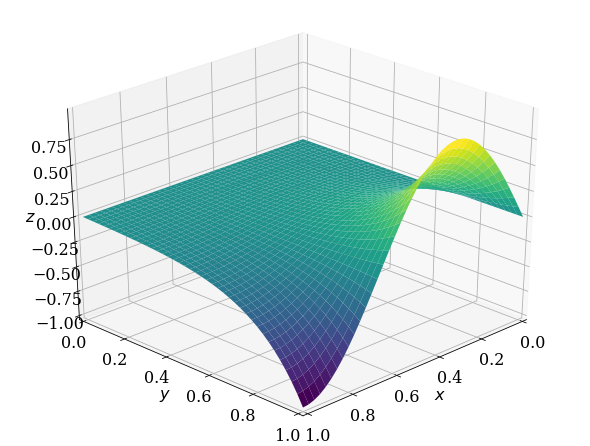

In [37]:
# Set parameters.
Lx = 1.0  # domain length in the x direction
Ly = 1.0  # domain length in the y direction
nx = 41  # number of points in the x direction
ny = 41  # number of points in the y direction

# Create the gridline locations.
x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

# Compute the analytical solution.
p_exact = laplace_solution(x, y, Lx, Ly)

# Plot the analytical solution.
plot_3d(x, y, p_exact)

### Hasta cuando iteramos?

Podemos emplear un bucle `while` que continue aplicando el esquema de relajacion en forma iterativa hasta que la diferencia entre iteraciones sucesivas sea *suficientemente pequeña*. 

Cuando procuramos comparar dos campos potenciales sucesivos ($\mathbf{p}^k$ and $\mathbf{p}^{k+1}$), una buena opcion es emplear la [norma L2](http://en.wikipedia.org/wiki/Norm_%28mathematics%29#Euclidean_norm) de la diferencia. Se define por:

$$
\begin{equation}
    \parallel \mathbf{p}^{k+1} - \mathbf{p}^k \parallel_{L_2} = \sqrt{\sum_{i, j} \left| p_{i, j}^{k+1} - p_{i, j}^k \right|^2}
\end{equation}
$$

Con esta formula, sumamos la diferencia entre iteraciones sucesivas en cada punto de la grilla. Si la grilla crece (por ejemplo, estamos refinando) habra mas puntos a comparar y en consecuencia mas contribuciones a la suma. La norma nos dara un valor mas grande unicamente debido al tamaño de grilla! A fin de evitar esto, **normalizamos** la norma, dividiendo la formula anterior por la norma del campo potencial en la iteracion $k$. 

Para dos iteraciones sucesivas, la **norma relativa L2** se calcula entonces como

$$
\begin{equation}
    \frac{\parallel \mathbf{p}^{k+1} - \mathbf{p}^k \parallel_{L_2}}{\parallel \mathbf{p}^k \parallel_{L_2}} = \frac{\sqrt{\sum_{i, j} \left| p_{i, j}^{k+1} - p_{i, j}^k \right|^2}}{\sqrt{\sum_{i, j} \left| p_{i, j}^k \right|^2}}
\end{equation}
$$

Con este proposito definimos la funcion `l2_norm`:

In [38]:
def l2_norm(p, p_ref):
    """
    Computes and returns the relative L2-norm of the difference
    between a solution p and a reference solution p_ref.

    Parameters
    ----------
    p : numpy.ndarray
        The solution as an array of floats.
    p_ref : numpy.ndarray
        The reference solution as an array of floats.

    Returns
    -------
    diff : float
        The relative L2-norm of the difference.
    """
    l2_diff = (numpy.sqrt(numpy.sum((p - p_ref)**2)) /
               numpy.sqrt(numpy.sum(p_ref**2)))
    return l2_diff

Ahora, definamos una funcion que aplique el metodo de Jacobi a la ecuacion de Laplace. Tres de las fronteras son bordes tipo Dirichlet y por lo tanto podemos dejarlas afuera del calculo. Solo el borde tipo Neumann requiere calcularse explicitamente en cada iteracion.

In [39]:
def laplace_2d_jacobi(p0, maxiter=20000, rtol=1e-6):
    """
    Solves the 2D Laplace equation using Jacobi relaxation method.

    The function assumes Dirichlet condition with value zero
    at all boundaries except at the right boundary where it uses
    a zero-gradient Neumann condition.
    The exit criterion of the solver is based on the relative L2-norm
    of the solution difference between two consecutive iterations.

    Parameters
    ----------
    p0 : numpy.ndarray
        The initial solution as a 2D array of floats.
    maxiter : integer, optional
        Maximum number of iterations to perform;
        default: 20000.
    rtol : float, optional
        Relative tolerance for convergence;
        default: 1e-6.

    Returns
    -------
    p : numpy.ndarray
        The solution after relaxation as a 2D array of floats.
    ite : integer
        The number of iterations performed.
    diff : float
        The final relative L2-norm of the difference.
    """
    p = p0.copy()
    diff = rtol + 1.0  # initial difference
    ite = 0  # iteration index
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        # Update the solution at interior points.
        p[1:-1, 1:-1] = 0.25 * (p[1:-1, :-2] + p[1:-1, 2:] +
                                p[:-2, 1:-1] + p[2:, 1:-1])
        # Apply Neumann condition (zero-gradient)
        # at the right boundary.
        p[1:-1, -1] = p[1:-1, -2]
        # Compute the residual as the L2-norm of the difference.
        diff = l2_norm(p, pn)
        ite += 1
    return p, ite, diff

##### Orden de Indices en filas y columnas

Recordemos que en la [ecuacion de calor 2D explicita](../modulo4/04_03_EcuacionCalor_2D_Explicita.ipynb) hemos almacenado los datos asociados con la coordenada $y$ en las filas, mientras que los datos asociados con la coordenada $x$ han sido almacenados en las columnas de la matriz 2D. 

Seguiremos aqui la misma convencion (si bien graficaremos en 3D). De esta forma, $p_{i,j}$ sera almacenado en formato vectorial como `p[j,i]`.

### Relajemos la solucion!

Los valores iniciales del campo potencial son cero en todo el dominio (estimacion inicial), excepto en la frontera superior: 

$$
p = \sin \left(  \frac{\frac{3}{2}\pi x}{L_x} \right) \text{ at } y=L_y
$$

In [40]:
# Set the initial conditions.
p0 = numpy.zeros((ny, nx))
p0[-1, :] = numpy.sin(1.5 * numpy.pi * x / Lx)

Ahora visualicemos la condicion inicial:

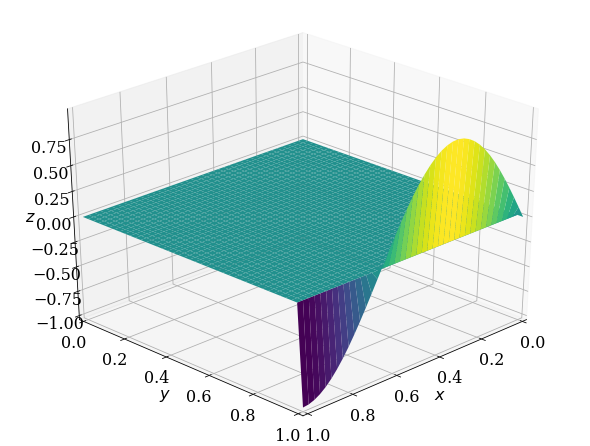

In [41]:
# Plot the initial conditions.
plot_3d(x, y, p0)

Corramos el *solver* iterativo con una **tolerancia** dada por la norma relativa L2 entre iteraciones sucesivas igual a $10^{-8}$.

In [42]:
# Compute the solution using Jacobi relaxation method.
p, ites, diff = laplace_2d_jacobi(p0, rtol=1e-8)
print('Jacobi relaxation: {} iterations '.format(ites) +
      'to reach a relative difference of {}'.format(diff))

Jacobi relaxation: 4473 iterations to reach a relative difference of 9.989253685041417e-09


Grafiquemos el campo final obtenido:

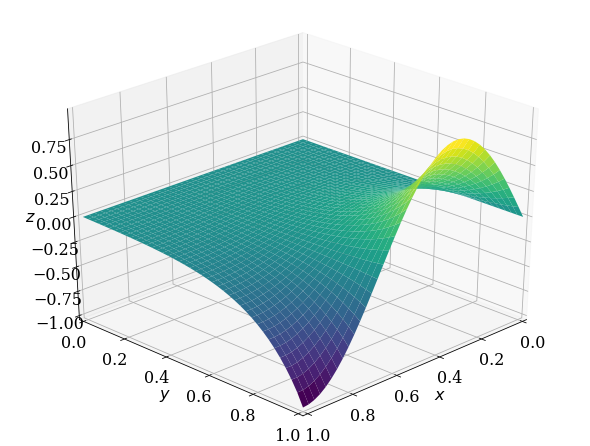

In [43]:
# Plot the numerical solution.
plot_3d(x, y, p)

## Analisis de Convergencia

### Convergencia, Orden 1

Queremos asegurarnos que nuestra funcion *Jacobi* trabaja apropiadamente ... puesto que disponemos de una solucion analitica, es posible efectuar un analisis de convergencia de grilla!
Corramos entonces nuestro *solver* para varios tamaños de grilla y estimemos la velocidad de disminucion de la norma relativa L2 entre iteraciones sucesivas.

Ahora ejecutemos el metodo de Jacobi aplicado a la ecuacion de Laplace usando 4 grillas diferentes, con el mismo criterio de salida (*stop criterion*) igual a $10^{-8}$. Luego, visualicemos el error versus el tamaño de grilla en un grafico *log-log*.

In [44]:
# List of the grid sizes to investigate.
nx_values = [11, 21, 41, 81]

# Create an empty list to record the error on each grid.
errors = []

# Compute the solution and error for each grid size.
for nx in nx_values:
    ny = nx  # same number of points in all directions.
    # Create the gridline locations.
    x = numpy.linspace(0.0, Lx, num=nx)
    y = numpy.linspace(0.0, Ly, num=ny)
    # Set the initial conditions.
    p0 = numpy.zeros((ny, nx))
    p0[-1, :] = numpy.sin(1.5 * numpy.pi * x / Lx)
    # Relax the solution.
    # We do not return the number of iterations or
    # the final relative L2-norm of the difference.
    p, _, _ = laplace_2d_jacobi(p0, rtol=1e-8)
    # Compute the analytical solution.
    p_exact = laplace_solution(x, y, Lx, Ly)
    # Compute and record the relative L2-norm of the error.
    errors.append(l2_norm(p, p_exact))

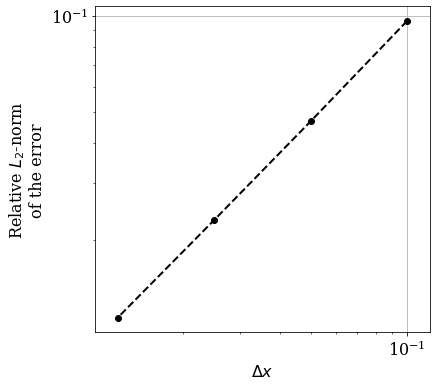

In [45]:
# Plot the error versus the grid-spacing size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.xlabel(r'$\Delta x$')
pyplot.ylabel('Relative $L_2$-norm\nof the error')
pyplot.grid()
dx_values = Lx / (numpy.array(nx_values) - 1)
pyplot.loglog(dx_values, errors,
              color='black', linestyle='--', linewidth=2, marker='o')
pyplot.axis('equal');

<div class="alert alert-block alert-success">
HmmHmm. That doesn't look like 2nd-order convergence, but we're using second-order finite differences. <i>What's going on?</i> The culprit is the boundary conditions. Dirichlet conditions are order-agnostic (a  set value is a set value), but the scheme we used for the Neumann boundary condition is 1st-order.  

Remember when we said that the boundaries drive the problem?  One boundary that's 1st-order completely tanked our spatial convergence.  Let's fix it!
</div>

### BCs tipo Neumann de orden 2

Hasta ahora, hemos usado la aproximacion de primer orden de una derivada para satisfacer BCs tipo Neumann. Para una frontera situada en $x=0$ esto se escribe:

$$
\begin{equation}
\frac{p^{k+1}_{1,j} - p^{k+1}_{0,j}}{\Delta x} = 0
\end{equation}
$$

la cual, resuelta para $p^{k+1}_{0,j}$ nos da:

$$
\begin{equation}
p^{k+1}_{0,j} = p^{k+1}_{1,j}
\end{equation}
$$

El empleo de tal condicion nos limitara a una convergencia de primer orden. En cambio, podemos procurar una aproximacion de segundo orden (*diferencias centradas*):

$$
\begin{equation}
\frac{p^{k+1}_{1,j} - p^{k+1}_{-1,j}}{2 \Delta x} = 0
\end{equation}
$$

la cual, resuelta para $p^{k+1}_{-1,j}$ nos da:

$$
\begin{equation}
p^{k+1}_{-1,j} = p^{k+1}_{1,j}
\end{equation}
$$

Escribamos la ecuacion de Jacobi en diferencias finitas con $i=0$:

$$
\begin{equation}
p^{k+1}_{0,j} = \frac{1}{4} \left(p^{k}_{0,j-1} + p^k_{0,j+1} + p^{k}_{-1,j} + p^k_{1,j} \right)
\end{equation}
$$

Notemos que la ecuacion recurre al punto no-existente (*nodo fantasma*) $p^k_{-1,j}$, pero de acuerdo a la igualdad anterior, disponemos de un valor que podemos sustituir, este es $p^k_{1,j}$. De esta forma, hemos encontrado la BC tipo Neumann de segundo orden:

$$
\begin{equation}
p^{k+1}_{0,j} = \frac{1}{4} \left(p^{k}_{0,j-1} + p^k_{0,j+1} + 2p^{k}_{1,j} \right)
\end{equation}
$$

##### Note 
<div class="alert alert-block alert-danger">
    
Do not confuse $p^{k+1}_{-1,j}$ with `p[-1]`:
    
`p[-1]` is a piece of Python code used to refer to the last element of a list or array named `p`.  $p^{k+1}_{-1,j}$ is a 'ghost' point that describes a position that lies outside the actual domain.
</div>

### Convergencia, Orden 2

Podemos copiar la funcion de Jacobi anterior y reemplazar unicamente la linea que implementa la BC tipo Neumann.  

##### Cuidado!
Recordemos que nuestro problema tiene el borde de Neumann situado en $x = L$ y **NO** en $x = 0$ tal como asumimos en la deduccion anterior.

In [46]:
def laplace_2d_jacobi_neumann(p0, maxiter=20000, rtol=1e-6):
    """
    Solves the 2D Laplace equation using Jacobi relaxation method.

    The function assumes Dirichlet condition with value zero
    at all boundaries except at the right boundary where it uses
    a zero-gradient second-order Neumann condition.
    The exit criterion of the solver is based on the relative L2-norm
    of the solution difference between two consecutive iterations.

    Parameters
    ----------
    p0 : numpy.ndarray
        The initial solution as a 2D array of floats.
    maxiter : integer, optional
        Maximum number of iterations to perform;
        default: 20000.
    rtol : float, optional
        Relative tolerance for convergence;
        default: 1e-6.

    Returns
    -------
    p : numpy.ndarray
        The solution after relaxation as a 2D array of floats.
    ite : integer
        The number of iterations performed.
    diff : float
        The final relative L2-norm of the difference.
    """
    p = p0.copy()
    diff = rtol + 1.0  # intial difference
    ite = 0  # iteration index
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        # Update the solution at interior points.
        p[1:-1, 1:-1] = 0.25 * (p[1:-1, :-2] + p[1:-1, 2:] +
                                p[:-2, 1:-1] + p[2:, 1:-1])
        # Apply 2nd-order Neumann condition (zero-gradient)
        # at the right boundary.
        p[1:-1, -1] = 0.25 * (2.0 * pn[1:-1, -2] +
                              pn[2:, -1] + pn[:-2, -1])
        # Compute the residual as the L2-norm of the difference.
        diff = l2_norm(p, pn)
        ite += 1
    return p, ite, diff

Efectuemos el analisis de refinamiento de grilla, y grafiquemos el error versus el espaciado de malla.

In [47]:
# List of the grid sizes to investigate.
nx_values = [11, 21, 41, 81]

# Create an empty list to record the error on each grid.
errors = []

# Compute the solution and error for each grid size.
for nx in nx_values:
    ny = nx  # same number of points in all directions.
    # Create the gridline locations.
    x = numpy.linspace(0.0, Lx, num=nx)
    y = numpy.linspace(0.0, Ly, num=ny)
    # Set the initial conditions.
    p0 = numpy.zeros((ny, nx))
    p0[-1, :] = numpy.sin(1.5 * numpy.pi * x / Lx)
    # Relax the solution.
    # We do not return the number of iterations or
    # the final relative L2-norm of the difference.
    p, _, _ = laplace_2d_jacobi_neumann(p0, rtol=1e-8)
    # Compute the analytical solution.
    p_exact = laplace_solution(x, y, Lx, Ly)
    # Compute and record the relative L2-norm of the error.
    errors.append(l2_norm(p, p_exact))

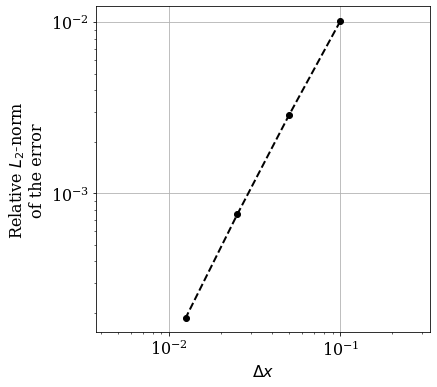

In [48]:
# Plot the error versus the grid-spacing size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.xlabel(r'$\Delta x$')
pyplot.ylabel('Relative $L_2$-norm\nof the error')
pyplot.grid()
dx_values = Lx / (numpy.array(nx_values) - 1)
pyplot.loglog(dx_values, errors,
              color='black', linestyle='--', linewidth=2, marker='o')
pyplot.axis('equal');

Bien! Esta mucho mejor. La convergencia no es *exactamente* de orden 2, pero esta muy cerca. Aclaremos que el termino ["suficientemente cerca"](http://ianhawke.github.io/blog/close-enough.html) con respecto a velocidades de convergencia medidas es una cuestion delicada!

<div class="alert alert-block alert-info">
Now, notice from this plot that the error on the finest grid is around $0.0002$. Given this, perhaps we didn't need to continue iterating until a target difference between two solutions of $10^{-8}$. The spatial accuracy of the finite difference approximation is much worse than that! But we didn't know it ahead of time, did we? That's the "catch 22" of iterative solution of systems arising from discretization of PDEs.
</div>    

## Comentario final

El metodo de Jacobi es el esquema de relajacion mas simple para explicar y aplicar. Es ademas el *peor* solver iterativo! En la practica, rara vez se lo emplea en modalidad de *solver*, aunque resulta util como *operador de suavizado* con metodos Multigrilla.

---
###### The cell below loads the style of the notebook

In [49]:
from IPython.core.display import HTML
css_file = '.././styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())